In [153]:
import pandas as pd
import seaborn as sns

from pandas.core.dtypes.common import is_numeric_dtype
import matplotlib.pyplot as plt

In [154]:
#import dataset from github
bank_data = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/Bank%20Data.csv'

In [155]:
df = pd.read_csv(bank_data)

In [156]:
#showing first 5 rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [158]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


# remove outliers

In [159]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [160]:
df.duplicated().sum()

0

In [161]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [162]:
df.Occupation.value_counts()

Occupation
_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: count, dtype: int64

In [163]:
df.Num_Bank_Accounts.value_counts()

Num_Bank_Accounts
6       6504
7       6408
8       6387
4       6100
5       6068
        ... 
1247       1
1721       1
703        1
1500       1
640        1
Name: count, Length: 540, dtype: int64

In [164]:
df.Credit_Utilization_Ratio.value_counts()

Credit_Utilization_Ratio
34.108530    1
35.030402    1
33.053114    1
33.811894    1
32.430559    1
            ..
29.566123    1
38.135424    1
38.226475    1
31.291849    1
29.150995    1
Name: count, Length: 50000, dtype: int64

In [165]:
df.Credit_History_Age.value_counts()

Credit_History_Age
16 Years and 1 Months     254
20 Years and 1 Months     254
18 Years and 7 Months     252
19 Years and 7 Months     252
18 Years and 6 Months     250
                         ... 
4 Years and 5 Months       21
0 Years and 11 Months      16
33 Years and 11 Months     15
34 Years and 0 Months      14
0 Years and 10 Months      13
Name: count, Length: 399, dtype: int64

# Data Exploration and Preprocessing:

In [166]:
df.rename(columns={'Credit_Mix':'Credit Scores'} , inplace=True)

In [167]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit Scores,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [168]:
df = df.drop(['ID','Age','Customer_ID','Name','SSN','Month','Monthly_Inhand_Salary','Monthly_Inhand_Salary','Type_of_Loan','Num_of_Delayed_Payment','Credit_History_Age','Amount_invested_monthly'],axis=1)

In [169]:
df.head()

,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit Scores,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,Scientist,19114.12,3,4,3,4,3,11.27,2022.0,Good,809.98,35.030402,No,49.574949,Low_spent_Small_value_payments,186.26670208571772
1,Scientist,19114.12,3,4,3,4,3,13.27,4.0,Good,809.98,33.053114,No,49.574949,High_spent_Medium_value_payments,361.44400385378196
2,Scientist,19114.12,3,4,3,4,-1,12.27,4.0,Good,809.98,33.811894,No,49.574949,Low_spent_Medium_value_payments,264.67544623342997
3,Scientist,19114.12,3,4,3,4,4,11.27,4.0,Good,809.98,32.430559,No,49.574949,High_spent_Medium_value_payments,343.82687322383634
4,_______,34847.84,2,4,6,1,3,5.42,5.0,Good,605.03,25.926822,No,18.816215,High_spent_Large_value_payments,485.2984336755923


# Handle any missing values

In [170]:
#Credit Scores this is our target variable
df['Credit Scores'].unique()

array(['Good', '_', 'Standard', 'Bad'], dtype=object)

In [171]:

df['Credit Scores'] = df['Credit Scores'].replace('_', pd.NA)


In [172]:
df.isnull().sum()

Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit Scores               9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [173]:
df.isnull().sum()

Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit Scores               9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [174]:
df.isnull().sum()

Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit Scores               9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [175]:
df.dropna(inplace=True)

In [176]:
df[['Credit Scores']].isnull().sum()

Credit Scores    0
dtype: int64

In [177]:
df.isnull().sum()

Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit Scores               0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [178]:
df.shape

(38912, 16)

In [179]:
sns.set()

# outliers finding

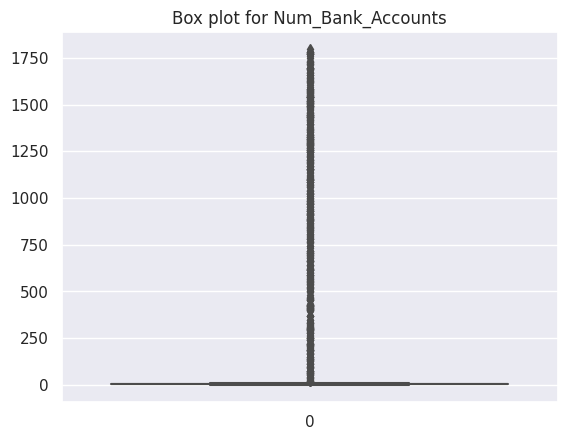

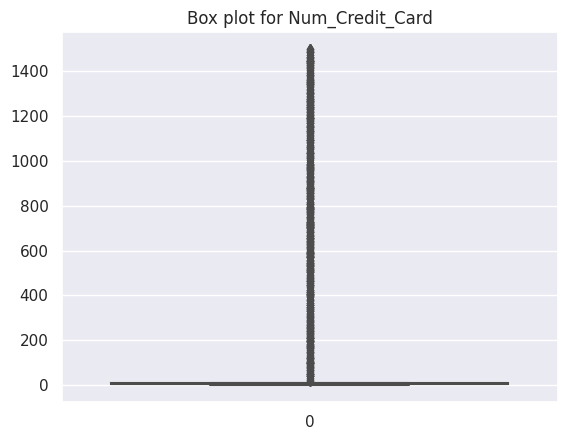

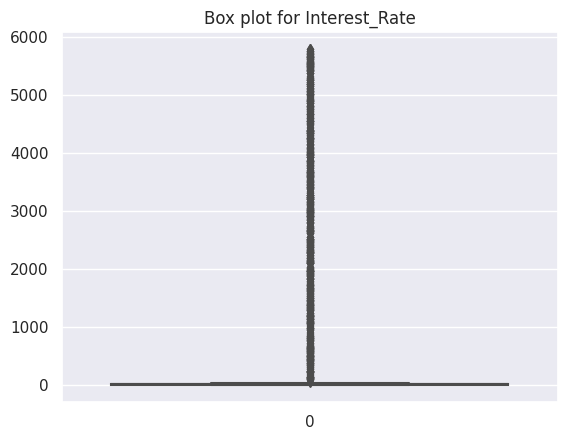

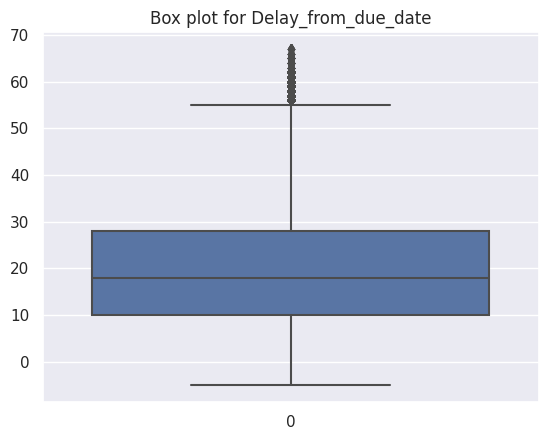

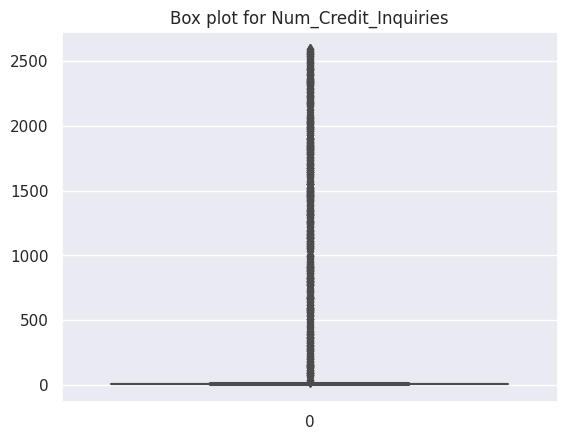

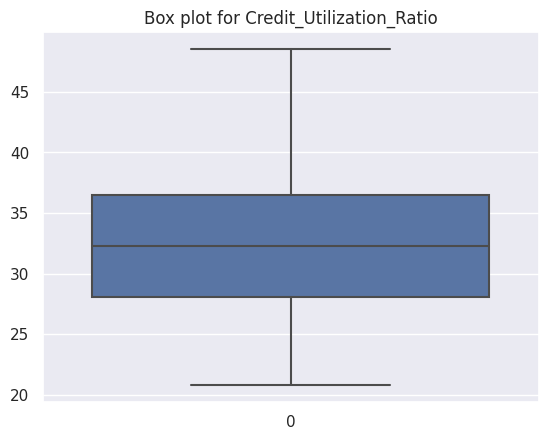

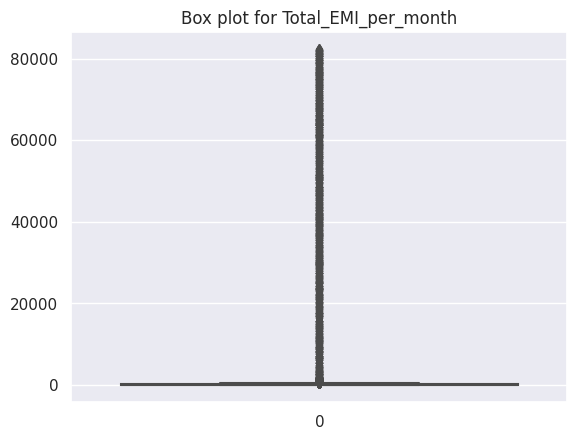

In [180]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        sns.boxplot(data=df[col])
        plt.title(f'Box plot for {col}')
        plt.show()
    
        
    


In [181]:
df.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000
mean,16.956389,22.653963,70.375514,20.988230,29.810932,32.313256,1503.428232
std,117.373909,128.218919,457.446740,14.810713,195.495827,5.103392,8673.222869
min,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.800587,0.000000
25%,3.000000,4.000000,7.000000,10.000000,4.000000,28.096399,31.909785
50%,6.000000,5.000000,13.000000,18.000000,7.000000,32.306816,73.637413
75%,7.000000,7.000000,20.000000,28.000000,10.000000,36.502679,172.062034
max,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


**if our performance is too bad then we will remove **

<Axes: xlabel='Num_Bank_Accounts', ylabel='count'>

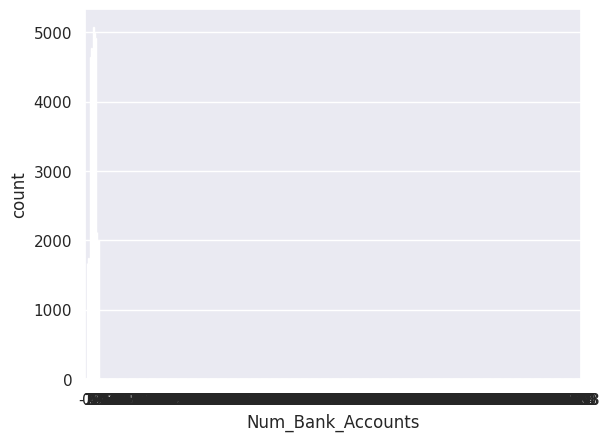

In [182]:
sns.countplot(x = df.Num_Bank_Accounts)

# - Encode

In [183]:
df.columns

Index(['Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit Scores',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [184]:
df['Credit Scores'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [185]:
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i] = LabelEncoder().fit_transform(df[i])

In [186]:
df.head()

,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit Scores,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,12,4806,3,4,3,121,3,885,2022.0,1,11499,35.030402,1,49.574949,6,2628
1,12,4806,3,4,3,121,3,1102,4.0,1,11499,33.053114,1,49.574949,2,22467
2,12,4806,3,4,3,121,-1,993,4.0,1,11499,33.811894,1,49.574949,5,9256
3,12,4806,3,4,3,121,4,885,4.0,1,11499,32.430559,1,49.574949,2,20603
4,15,8269,2,4,6,3,3,3181,5.0,1,10300,25.926822,1,18.816215,1,30267


# features selection

In [187]:
X = df.drop('Credit Scores' , axis =1 )
Y = df[['Credit Scores']]

In [188]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size=.2 , random_state=100)

In [190]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=100)
etc.fit(xtrain , ytrain)

ExtraTreesClassifier(random_state=100)

In [191]:
etc.feature_importances_

array([0.0258809 , 0.03549286, 0.05967977, 0.03193272, 0.05873011,
       0.12569818, 0.17731494, 0.07074362, 0.0320701 , 0.06985645,
       0.02224756, 0.20690081, 0.02394781, 0.01877161, 0.04073258])

In [192]:
imp = pd.DataFrame(etc.feature_importances_, columns=['Gain_Score'])
cols = pd.DataFrame(df.columns, columns=['Feature_Names'])
gains = pd.concat([imp , cols] , axis = 1)

In [193]:
gains.nlargest(12,'Gain_Score')

,Gain_Score,Feature_Names
11,0.206901,Credit_Utilization_Ratio
6,0.177315,Delay_from_due_date
5,0.125698,Num_of_Loan
7,0.070744,Changed_Credit_Limit
9,0.069856,Credit Scores
2,0.059680,Num_Bank_Accounts
4,0.058730,Interest_Rate
14,0.040733,Payment_Behaviour
1,0.035493,Annual_Income
8,0.032070,Num_Credit_Inquiries


Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit Scores',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object

In [194]:
df.shape

(38912, 16)

In [195]:
df.columns

Index(['Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit Scores',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [196]:
df.drop('Occupation' , axis =1 , inplace = True)

In [197]:
df.describe()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit Scores,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
count,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000,38912.000000
mean,7661.399337,16.956389,22.653963,70.375514,97.001619,20.988230,2187.048134,29.810932,1.222759,6284.348170,32.313256,1.400545,1503.428232,3.443385,19455.499846
std,4398.531779,117.373909,128.218919,457.446740,63.721398,14.810713,1122.379903,195.495827,0.803015,3640.950692,5.103392,0.693818,8673.222869,2.029411,11233.070907
min,0.000000,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,20.800587,0.000000,0.000000,0.000000,0.000000
25%,3861.750000,3.000000,4.000000,7.000000,3.000000,10.000000,1104.000000,4.000000,1.000000,3121.000000,28.096399,1.000000,31.909785,2.000000,9727.750000
50%,7692.000000,6.000000,5.000000,13.000000,102.000000,18.000000,1968.000000,7.000000,1.000000,6298.000000,32.306816,2.000000,73.637413,3.000000,19455.500000
75%,11444.000000,7.000000,7.000000,20.000000,141.000000,28.000000,3331.000000,10.000000,2.000000,9452.000000,36.502679,2.000000,172.062034,5.000000,29183.250000
max,15298.000000,1798.000000,1499.000000,5799.000000,219.000000,67.000000,3751.000000,2593.000000,2.000000,12554.000000,48.540663,2.000000,82398.000000,6.000000,38908.000000


In [198]:
from sklearn.preprocessing import MaxAbsScaler

In [199]:
scaler = MaxAbsScaler()

In [200]:
df['Annual_Income'],df['Changed_Credit_Limit'] , df['Num_Credit_Inquiries'] , df['Outstanding_Debt'] ,df['Credit_Utilization_Ratio'] , df['Total_EMI_per_month']=scaler.fit_transform([df['Annual_Income'],df['Changed_Credit_Limit'] , df['Num_Credit_Inquiries'] , df['Outstanding_Debt'] ,df['Credit_Utilization_Ratio'] , df['Total_EMI_per_month'] ])

In [201]:
df.head()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit Scores,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,0.417949,3,4,3,121,3,0.076963,0.175841,1,1.0,0.003046,1,0.004311,6,2628
1,0.417949,3,4,3,121,3,0.095834,0.000348,1,1.0,0.002874,1,0.004311,2,22467
2,0.417949,3,4,3,121,-1,0.086355,0.000348,1,1.0,0.002940,1,0.004311,5,9256
3,0.417949,3,4,3,121,4,0.076963,0.000348,1,1.0,0.002820,1,0.004311,2,20603
4,0.802816,2,4,6,3,3,0.308835,0.000485,1,1.0,0.002517,1,0.001827,1,30267


# Model Selection:

In [202]:
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier ,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings as w
w.filterwarnings('ignore')

In [203]:
df.columns

Index(['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit Scores',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [204]:
X = df.drop('Credit Scores' , axis =1 )
Y = df[['Credit Scores']]

In [205]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size=.2 , random_state=100)

In [206]:
#AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain , ytrain )

AdaBoostClassifier()

In [207]:
ada.score(xtrain , ytrain)

0.817790484756979

In [208]:
ada.score(xtest , ytest)

0.8171656173711936

In [209]:
#RandomForestClassifier
ran = RandomForestClassifier(random_state=100)

In [210]:
ran.fit(xtrain , ytrain )

RandomForestClassifier(random_state=100)

In [211]:
ran.score(xtest , ytest)

0.9509186688937428

In [212]:
ran.score(xtrain , ytrain)

1.0

In [213]:
#ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=100)

In [214]:
etc.fit(xtrain , ytrain)

ExtraTreesClassifier(random_state=100)

In [215]:
etc.score(xtrain , ytrain)

1.0

In [216]:
etc.score(xtest , ytest)

0.9225234485416934

In [217]:
reg = LogisticRegression(random_state=100)

In [218]:
reg.fit(xtrain , ytrain)

LogisticRegression(random_state=100)

In [219]:
reg.score(xtest , ytest)

0.5255043042528588

In [220]:
reg.score(xtrain , ytrain)

0.5186803302386842

# Model Training

In [221]:
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix

In [222]:
print(classification_report(ytest , etc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1826
           1       0.91      0.96      0.94      2367
           2       0.94      0.89      0.91      3590

    accuracy                           0.92      7783
   macro avg       0.92      0.93      0.92      7783
weighted avg       0.92      0.92      0.92      7783



In [223]:
print(classification_report(ytest , ran.predict(xtest)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1826
           1       0.96      0.97      0.96      2367
           2       0.97      0.93      0.95      3590

    accuracy                           0.95      7783
   macro avg       0.95      0.96      0.95      7783
weighted avg       0.95      0.95      0.95      7783



In [224]:
confusion_matrix(ytest , ran.predict(xtest))

array([[1787,    0,   39],
       [   0, 2289,   78],
       [ 161,  104, 3325]])

In [225]:
confusion_matrix(ytest , etc.predict(xtest))

array([[1717,    0,  109],
       [   0, 2266,  101],
       [ 180,  213, 3197]])

# Hyperparameter Tuning

In [ ]:
#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 151, 201, 251, 301], #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,],
    'min_samples_split': [2,3,4,5,6,7,810],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV

In [ ]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

In [ ]:
rf_random_search.best_params_

In [ ]:
#laptop problem korsa Hyperparameter Tuning r kora galo na